In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
data = pd.read_csv('Housing Price data set.csv')

In [21]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [22]:
data.shape

(546, 13)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


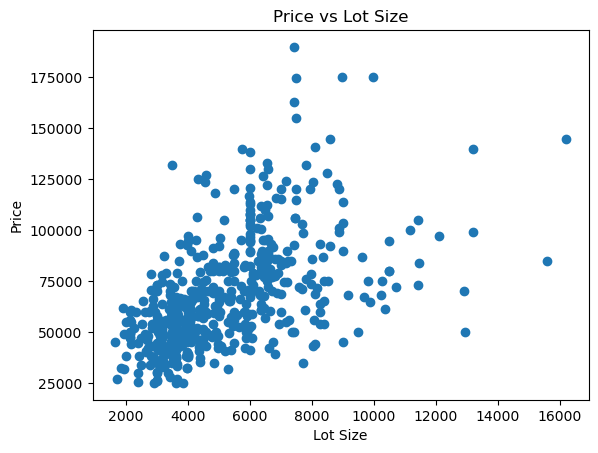

In [24]:
#data visualization
plt.scatter(data['lotsize'], data['price'])
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size')
plt.show()

In [25]:
# Data preprocessing
# Encode categorical variables
label_encoders = {}
categorical_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


In [26]:
# Split features and target variable
X = data.drop(['Unnamed: 0', 'price'], axis=1)
y = data['price']

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    int32  
 7   recroom     546 non-null    int32  
 8   fullbase    546 non-null    int32  
 9   gashw       546 non-null    int32  
 10  airco       546 non-null    int32  
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 42.8 KB


In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [31]:
# Model evaluation
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 15108.539981199103
Testing RMSE: 16016.397426383435
